# Neural network classification


In [1]:
import tensorflow as tf

In [2]:
import tensorflow_datasets as tfds

In [3]:
# Load Tensorflow datasets from TS
data, metadata = tfds.load("mnist", as_supervised=True, with_info=True)

In [ ]:
data

In [5]:
metadata

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_dir='/Users/jasonsepulveda/tensorflow_datasets/mnist/3.0.1',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",


In [6]:
data_train = data["train"]
data_test = data["test"]

In [9]:
class_name = metadata.features["label"].names

In [10]:
# Standarization
# Now: 0-255 = 1Byte
# Transform to (0-1)
# From 0-255 to 0-1 where (0=0)

def standarization(images, labels):
    images = tf.cast(images, tf.float32)
    images = images / 255
    return images, labels


data_train = data_train.map(standarization)
data_test = data_test.map(standarization)

# Add in cache in order to save data in memory, it is more efficienty

data_train = data_train.cache()
data_test = data_test.cache()


2025-02-16 08:03:37.025600: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:376] The default buffer size is 262144, which is overridden by the user specified `buffer_size` of 8388608
2025-02-16 08:03:37.031971: W tensorflow/core/kernels/data/cache_dataset_ops.cc:914] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2025-02-16 08:03:37.032144: W tensorflow/core/kernels/data/cache_dataset_ops.cc:914] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `datas

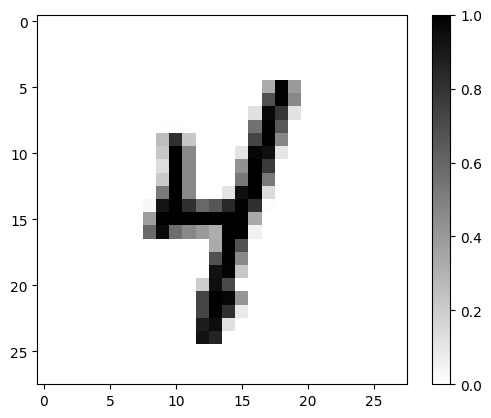

In [11]:
# Take one data and display in screen

for image, label in data_train.take(1):
    break

import matplotlib.pyplot as plt

# Display
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.show()

2025-02-16 08:07:08.799064: W tensorflow/core/kernels/data/cache_dataset_ops.cc:914] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2025-02-16 08:07:08.799122: W tensorflow/core/kernels/data/cache_dataset_ops.cc:914] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2025-02-16 08:07:08.801551: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence

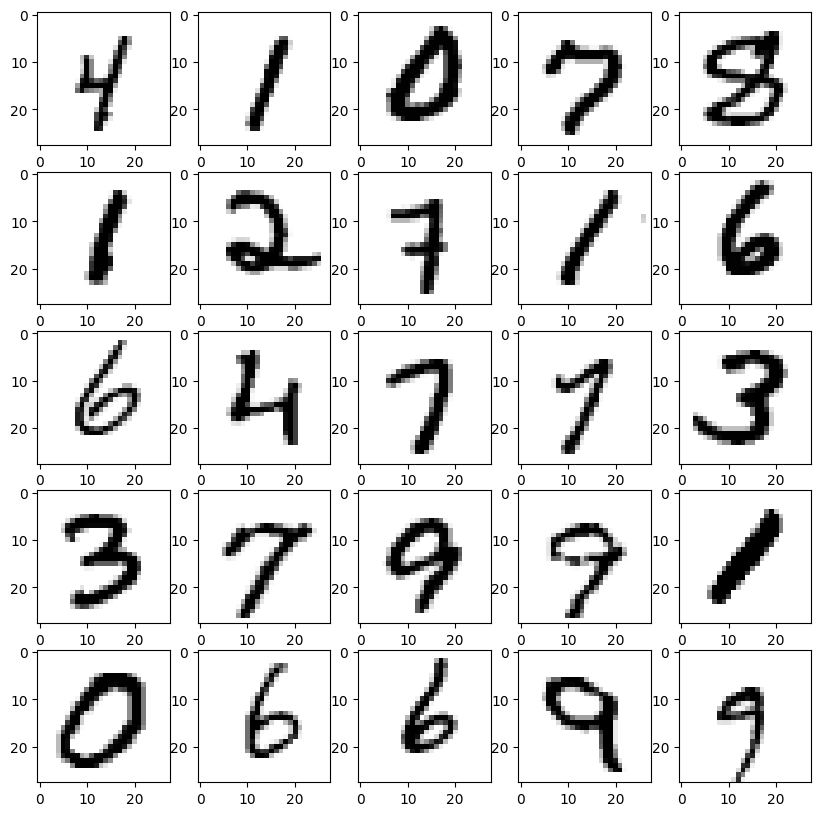

In [ ]:
# changes
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(data_train.take(25)):
    plt.subplot(5,5,i+1)
    plt.imshow(image, cmap=plt.cm.binary)
plt.show()

In [15]:
# Model Definition

model = tf.keras.Sequential([
    # 784 input
    tf.keras.Input(shape=(28,28,1)),
    tf.keras.layers.Flatten(),
    # Hiden layer
    tf.keras.layers.Dense(1),
    # Output layer
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [16]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           785 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │            20 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 805 (3.14 KB)

 Trainable params: 805 (3.14 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)

In [18]:
BATCH_SIZE = 32

data_train = data_train.repeat().shuffle(60000).batch(BATCH_SIZE)
data_test = data_test.batch(BATCH_SIZE)

In [19]:
import math

In [20]:
# Training

training = model.fit(
    data_train,
    epochs=10,
    steps_per_epoch=math.ceil(60000/BATCH_SIZE)
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 406us/step - accuracy: 0.2127 - loss: 1.9846
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 406us/step - accuracy: 0.3339 - loss: 1.6563
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 426us/step - accuracy: 0.3992 - loss: 1.5690
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 398us/step - accuracy: 0.4075 - loss: 1.5417
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 401us/step - accuracy: 0.4207 - loss: 1.5290
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 418us/step - accuracy: 0.4236 - loss: 1.5218
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 422us/step - accuracy: 0.4287 - loss: 1.5079
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 400us/step - accuracy: 0.4225 - loss: 1.5103
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 462us/step - accuracy: 0.4231 - loss: 1.5054
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 443us/step - accuracy: 0.4215 - loss: 1.5064


42% accuracy it means that the model should be trained again with more dense layer

In [26]:
# Add more layer

model = tf.keras.Sequential([
    # 784 input
    tf.keras.Input(shape=(28,28,1)),
    tf.keras.layers.Flatten(),
    # Hiden layer
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    # Output layer
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [27]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)

In [24]:
BATCH_SIZE = 32

data_train = data_train.repeat().shuffle(60000).batch(BATCH_SIZE)
data_test = data_test.batch(BATCH_SIZE)

In [29]:
training = model.fit(
    data_train,
    epochs=10
)

Epoch 1/10


ValueError: Argument `output` must have rank (ndim) `target.ndim - 1`. Received: target.shape=(None, None), output.shape=(None, 10)

In [31]:
# ✅ Cargar el dataset MNIST correctamente
(data_train, y_train), (data_test, y_test) = tf.keras.datasets.mnist.load_data()

# ✅ Normalizar los datos (convertir a float32 y escalar entre 0 y 1)
data_train = data_train.astype("float32") / 255.0
data_test = data_test.astype("float32") / 255.0

# ✅ Ajustar la forma para que incluya un canal de color (necesario para ConvNets)
data_train = data_train.reshape(-1, 28, 28, 1)
data_test = data_test.reshape(-1, 28, 28, 1)

# ✅ Convertir etiquetas a enteros `int32`
y_train = y_train.astype("int32")
y_test = y_test.astype("int32")

# ✅ Crear datasets de TensorFlow con batches
BATCH_SIZE = 32
data_train = tf.data.Dataset.from_tensor_slices((data_train, y_train)).shuffle(60000).batch(BATCH_SIZE)
data_test = tf.data.Dataset.from_tensor_slices((data_test, y_test)).batch(BATCH_SIZE)

# ✅ Definir el modelo corregido
model = tf.keras.Sequential([
    tf.keras.Input(shape=(28,28,1)),  # Input layer explícita
    tf.keras.layers.Flatten(),  # Aplanar imagen de 28x28x1 → 784
    tf.keras.layers.Dense(50, activation="relu"),  # Capa oculta 1
    tf.keras.layers.Dense(50, activation="relu"),  # Capa oculta 2
    tf.keras.layers.Dense(10, activation="softmax")  # Capa de salida con 10 clases
])

# ✅ Compilar el modelo
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)

# ✅ Definir `steps_per_epoch`
steps_per_epoch = math.ceil(60000 / BATCH_SIZE)

# ✅ Entrenar el modelo
training = model.fit(
    data_train,
    epochs=10,
    steps_per_epoch=steps_per_epoch,
    validation_data=data_test
)

# ✅ Evaluar el modelo
test_loss, test_acc = model.evaluate(data_test)
print(f"\nTest Accuracy: {test_acc:.4f}")


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 704us/step - accuracy: 0.8532 - loss: 0.5135 - val_accuracy: 0.9495 - val_loss: 0.1721
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 654us/step - accuracy: 0.9536 - loss: 0.1545 - val_accuracy: 0.9622 - val_loss: 0.1251
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 674us/step - accuracy: 0.9682 - loss: 0.1040 - val_accuracy: 0.9677 - val_loss: 0.1095
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 649us/step - accuracy: 0.9746 - loss: 0.0812 - val_accuracy: 0.9713 - val_loss: 0.0885
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 649us/step - accuracy: 0.9804 - loss: 0.0645 - val_accuracy: 0.9732 - val_loss: 0.0875
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 665us/step - accuracy: 0.9829 - loss: 0.0558 - val_accuracy: 0.9742 - val_loss: 0.0870
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 662us/step - accuracy: 0.9852 - loss: 0.0464 - val_accuracy: 0.9761 - val_loss: 0.0832
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 673us/step - accuracy: 0.9865 -

This case Dense networks are good to predict features, numerical features, tabular tables.

In [32]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 50)             │        39,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 126,932 (495.83 KB)

 Trainable params: 42,310 (165.27 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 84,622 (330.56 KB)

# Good to know, but model should contain other algorith